<a href="https://colab.research.google.com/github/JooVLC/Coursera-TensorFlow-in-practice-specialization/blob/main/Exercise_2_Handwriting_Recognition_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

print(tf.__version__)

2.7.0


In [68]:
class tf_stop_training_after_hit_accuracy_callback(keras.callbacks.Callback):
  def __init__(self, desired_accuracy):
    self.desired_accuracy = desired_accuracy
    super().__init__()

  def on_epoch_end(self, epoch, logs={}):
    current_epoch_accuracy = logs.get('accuracy')
    if current_epoch_accuracy is not None and current_epoch_accuracy >= self.desired_accuracy:
      self.model.stop_training = True


In [55]:
selected_dataset = keras.datasets.mnist

In [56]:
(train_images, train_labels), (test_images, test_labels) = selected_dataset.load_data()

11501568/11490434 [==============================] - 0s 0us/step


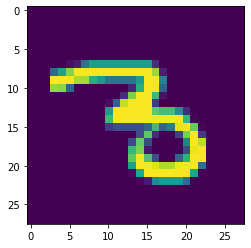

In [58]:
import matplotlib.pyplot as plt
plt.imshow(train_images[30])

In [59]:
train_images_normalized = train_images / 255.0
test_images_normalized = test_images / 255.0

In [63]:
model = keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=512, activation=tf.nn.relu))
model.add(keras.layers.Dense(units=10, activation=tf.nn.softmax))

In [69]:
callback_to_stop_training = tf_stop_training_after_hit_accuracy_callback(0.99)

In [70]:
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images_normalized, train_labels, epochs=10000, callbacks=[callback_to_stop_training])

Epoch 1/10000
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0203 - accuracy: 0.9937


In [71]:
model.evaluate(test_images_normalized, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0631 - accuracy: 0.9818


[0.06310193240642548, 0.9818000197410583]